In [1]:
import numpy as np

## 入力 --> 中間 (2 --> 3)

In [2]:
# 2行3列の重み
# np.random.seed(1) # 乱数の固定
W1 = np.random.randn(2, 3)
W1

array([[ 1.5217943 ,  0.6583959 , -0.57024777],
       [ 0.36538967, -0.79678635,  1.02704232]])

In [3]:
b1 = np.random.randn(3)
b1

array([ 0.19623548,  0.20705791, -1.84892494])

In [4]:
b1.shape

(3,)

In [5]:
# サンプル数: 10, 入力変数: 2
x = np.random.randn(10, 2)
x

array([[-0.3503479 ,  0.85316832],
       [ 0.22583983,  1.13003154],
       [-0.74818147,  1.41871142],
       [ 1.13212835, -0.27425191],
       [ 0.95480926,  0.35541417],
       [-2.23927598,  0.84741264],
       [-0.29101914,  0.69122913],
       [ 1.84853431, -0.9061379 ],
       [ 0.27826776,  1.29755557],
       [-0.70214575,  0.01593935]])

In [6]:
x.shape

(10, 2)

In [7]:
W1.shape

(2, 3)

In [8]:
u1 = np.dot(x, W1) + b1 # np.dot: 行列積
u1

array([[-0.02518306, -0.70340258, -0.77289987],
       [ 0.9528191 , -0.54464378, -0.81711939],
       [-0.42396032, -1.4159516 ,  0.03480055],
       [ 1.81889313,  1.17096676, -2.77618694],
       [ 1.77912344,  0.55251126, -2.02837741],
       [-2.90184612, -1.94247904,  0.29834585],
       [ 0.00593219, -0.53530984, -0.97305035],
       [ 2.67823102,  2.14612363, -3.83368949],
       [ 1.09381517, -0.64360631, -0.67496203],
       [-0.86646184, -0.26793223, -1.4321575 ]])

In [9]:
u1.shape

(10, 3)

In [10]:
def sigmoid(x): # xが来たら、sigmoidを計算
    # sigmoid: 1/1 + e**-x
    return 1 / (1 + np.exp(-x))

In [11]:
sigmoid(u1)

array([[0.49370457, 0.33105826, 0.31585214],
       [0.72168177, 0.36710798, 0.30637548],
       [0.39556947, 0.19529703, 0.50869926],
       [0.86043326, 0.76331972, 0.05862464],
       [0.85558859, 0.63471803, 0.11625552],
       [0.05206238, 0.12537576, 0.5740381 ],
       [0.50148304, 0.36927931, 0.27427292],
       [0.93572982, 0.89530599, 0.02117173],
       [0.74909946, 0.34443178, 0.33738665],
       [0.29599105, 0.4334148 , 0.19276274]])

In [12]:
def relu(x):
    # relu: max(0, x)
    return np.maximum(0, x)

In [13]:
u1

array([[-0.02518306, -0.70340258, -0.77289987],
       [ 0.9528191 , -0.54464378, -0.81711939],
       [-0.42396032, -1.4159516 ,  0.03480055],
       [ 1.81889313,  1.17096676, -2.77618694],
       [ 1.77912344,  0.55251126, -2.02837741],
       [-2.90184612, -1.94247904,  0.29834585],
       [ 0.00593219, -0.53530984, -0.97305035],
       [ 2.67823102,  2.14612363, -3.83368949],
       [ 1.09381517, -0.64360631, -0.67496203],
       [-0.86646184, -0.26793223, -1.4321575 ]])

In [14]:
z1 = relu(u1)
z1

array([[0.        , 0.        , 0.        ],
       [0.9528191 , 0.        , 0.        ],
       [0.        , 0.        , 0.03480055],
       [1.81889313, 1.17096676, 0.        ],
       [1.77912344, 0.55251126, 0.        ],
       [0.        , 0.        , 0.29834585],
       [0.00593219, 0.        , 0.        ],
       [2.67823102, 2.14612363, 0.        ],
       [1.09381517, 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

## 中間 --> 出力 (3 --> 2)

In [15]:
W2 = np.random.randn(3, 2)
W2

array([[ 0.87578226,  0.73959343],
       [ 0.61346464, -0.65481173],
       [ 0.86474353,  0.59962514]])

In [16]:
b2 = np.random.randn(2)
b2

array([1.00459401, 1.8061573 ])

In [17]:
W2.shape

(3, 2)

In [18]:
b2.shape

(2,)

In [19]:
u2 = np.dot(z1, W2) + b2
u2

array([[1.00459401, 1.8061573 ],
       [1.83905607, 2.51085604],
       [1.03468755, 1.82702458],
       [3.31589504, 2.38463593],
       [2.90166488, 2.76019445],
       [1.26258665, 1.98505297],
       [1.00978932, 1.81054471],
       [4.66671218, 2.38165243],
       [1.96253793, 2.61513581],
       [1.00459401, 1.8061573 ]])

In [20]:
def softmax(x):
    exp_x = np.exp(x - np.max(x)) # 指数関数化
    # np.max(): オーバーフローを防ぐために、x の入ってきた値の最大値を使う
    return exp_x / np.sum(exp_x) # 分母は指数関数の合計値 --> オーバーフローのリスク有 (桁溢れ)

In [21]:
softmax(u2[0]) # 足したら1になる

array([0.30969122, 0.69030878])

In [22]:
softmax(u2[0]) # x - np.max(x) にしてもしなくてもsoftmaxの値は変わらない

array([0.30969122, 0.69030878])

In [23]:
y = softmax(u2[0])
y

array([0.30969122, 0.69030878])

In [24]:
np.argmax(y)

1

In [25]:
def softmax(x): # 複数で入ってきた場合と1つで入ってきた場合で分ける必要がある
    if x.ndim == 2: # 2次元で来た場合
        x =   x - x.max(axis=1, keepdims=True) # 次元数を確保したまま持ってくる
        x =   np.exp(x) # 1行上のxをexp(x)のxに持ってくる
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1: # 1次元で来た場合
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))
        
    return x

In [26]:
softmax(u2[0]) # elif部分を実行

array([0.30969122, 0.69030878])

In [27]:
softmax(u2) # if部分を実行

array([[0.30969122, 0.69030878],
       [0.33809391, 0.66190609],
       [0.31166709, 0.68833291],
       [0.71733066, 0.28266934],
       [0.53530874, 0.46469126],
       [0.32685011, 0.67314989],
       [0.30986396, 0.69013604],
       [0.90763211, 0.09236789],
       [0.34240435, 0.65759565],
       [0.30969122, 0.69030878]])

## レイヤとしてまとめていく

- 変数
    - パラメータ (W, b, etc.) = params
    - 勾配 (傾きの値) = grads
- メソッド
    - 順伝播 = forward
    - 逆伝播 = backward

### Affine変換 (線形変換)

In [28]:
class Affine:
    # パラメータの初期化    
    def __init__(self, W, b):
        self.params = [W, b]
    
    # 順伝播
    def forward(self, x):
        W, b = self.params # __init__内で定義したparamsの値を持ってくる
        out   = np.dot(x, W) + b
        return out

### Relu関数 (非線形変換)

In [29]:
 class Relu:
        
        def __init__(self):
            self.params = [] # 空で初期化
            
        def forward(self, x):
            return np.maximum(0, x)

In [30]:
W1 = np.random.randn(2, 3)
b1  = np.random.randn(3)

W2 = np.random.randn(3, 2)
b2  = np.random.randn(2)

In [31]:
class NN:
    # 重みの初期化(W, b)
    def  __init__(self, n_in, n_hidden, n_out):
            
        # W, bの初期化
        W1 = np.random.randn(n_in, n_hidden) # n_in: input部分、n_hidden: 隠れ層の部分
        b1  = np.random.randn(n_hidden)
        W2 = np.random.randn(n_hidden, n_out) # n_out: output部分
        b2  = np.random.randn(n_out)
        
        # レイヤを全てまとめる
        self.layers = [
            Affine(W1, b1), # 線形変換
            Relu(), # 非線形変換
            Affine(W2, b2) # 線形変換
        ]
    
        # パラメータもまとめる
        self.params = [] # 空で定義
        for layer in self.layers: # まとめたレイヤから1つずつ取り出す
            self.params += layer.params

    # 推論
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x) # レイヤから1つずつ取り出して、順伝播(Affine->Relu->Affine)を行って、xに入れる
        return x # forが終わったらxを返す

In [32]:
x = np.random.randn(10, 4)
x

array([[ 0.15462106,  3.40226488,  0.7170476 ,  0.20729256],
       [-0.38656063, -0.67547516,  0.93002315,  0.02151904],
       [-0.05913063,  0.04459165, -0.99117541, -1.62564992],
       [-0.00754244, -0.43010632, -0.66328061, -0.26531219],
       [ 0.20280208,  0.27339508,  0.79701795,  2.77283373],
       [ 1.33265762, -0.58770624,  0.43754993,  0.77678151],
       [-0.80316974,  0.01657396,  0.17988655,  1.48730058],
       [ 1.55973066,  0.14878533, -2.06498805,  0.87799089],
       [ 0.8202454 ,  0.69270584,  0.53305263,  0.49669397],
       [-1.44935834,  0.05087876,  0.07864556,  0.64758715]])

In [33]:
model = NN(4, 10, 3) # 入力層=4, 中間層=10, 出力層=3(分類)

In [34]:
model.predict(x)

array([[-6.51739805,  1.08127908, -0.57164515],
       [-5.60117271,  2.53928048, -0.55142402],
       [-2.75920549, -2.06308259, -0.49264387],
       [ 2.70474154,  3.59501835,  3.49244043],
       [ 9.28905241,  3.01286985, 11.17094777],
       [ 5.25914896, -0.23908296,  8.275765  ],
       [ 4.90829939,  5.19781461,  5.79458245],
       [25.2753704 ,  2.65826811, 15.96723505],
       [-0.94978282, -0.02607315,  3.79430964],
       [-1.47368341,  5.62179486,  1.47690855]])

## 逆伝播

### Affine

In [35]:
class Affine:
    # パラメータの初期化    
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)] # 勾配の値。初期値は何もない
        # np.zeros_like(): ()と同じ方の0で埋めた行列で初期化
        self.x = None # 入ってきたxの形
    
    # 順伝播
    def forward(self, x):
        self.x = x
        W, b = self.params # __init__内で定義したparamsの値を持ってくる
        out = np.dot(x, W) + b
        return out
    
    # 逆伝播
    def backward(self, dout): # dout: 後ろから入ってきた値
        W, b  = self.params # W, bを使う
        dx = np.dot(dout, W.T) # Chain rule
        dW = np.dot(self.x.T, dout) # Chain rule
        db = np.sum(dout, axis=0) # 前から戻ってきたものを合計する(repeat)。axisは縦横の方向を指定
        
        self.grads[0][...] = dW # np.zeros_like(W)のWの値
        self.grads[1][...] = db # np.zeros_like(b)のbの値
        # [...]: deep cope, メモリを固定した上でコピー。ない場合はshallow copy。...: 3点リーダー
        
        return dx # 入力を微分した値を返す

# 87-88 手書きのため後回し

## Sigmoid

In [36]:
class Sigmoid:
    
    def __init__(self):
        self.params = []
        self.grads = []
        self.out = None # 「何が出力されたか」をインスタンス変数として保持する必要がある。
        # --> Sigmoid関数は微分を計算する際に出力結果を用いるから
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x)) # 1 / 1 + e**-x
        self.out = out
        return out
    
    def backward(self, dout): # dout: 前からどんな微分の値が来たかを返すための引数
        dx = dout * (1.0 - self.out) * self.out # (1 - y) * y
        return dx

In [37]:
sigmoid = Sigmoid()

In [38]:
x = np.array([1, 2, 4, -3])
sigmoid.forward(x)

array([0.73105858, 0.88079708, 0.98201379, 0.04742587])

In [39]:
dout = np.array([1, 3, 4, 5]) # 前の微分の結果
sigmoid.backward(dout)

array([0.19661193, 0.31498076, 0.07065082, 0.2258833 ])

## Relu

In [40]:
class Relu:
    
    def __init__(self):
        self.params = []
        self.grads = []
        self.x = None # 「入力値が正か負か」をインスタンス変数として保持する必要がある
        
    def forward(self, x):
        self.x = x # インスタン変数にまず入れる
        return np.maximum(0, self.x)
    
    def backward(self, dout):
        return np.where(self.x > 0, dout, 0) # self.xが0よりも大きい場合、doutを出力。それ以外は0を出力        

In [41]:
x = np.array([1, 2, 4, -3])
dout = np.array([1, 3, 4, 5])

In [42]:
relu = Relu()

In [43]:
relu.forward(x)

array([1, 2, 4, 0])

In [44]:
relu.backward(dout) # xの部分が正の部分についてはそのままdout返し、負の部分は0を返す

array([1, 3, 4, 0])

## Softmax with Loss

In [45]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size) # 1xtのサイズ
        y = y.reshape(1, y.size)
    
    # 教師データがOne-Hot表現の場合 ([0, 0, 1], [0, 1, 0]など)
    elif t.size == y.size:
        t = t.argmax(axis=1) # One-Hot表現の1の部分のインデックスを取る。
        # ex: [0, 0, 1] --> 2, [0, 1, 0] --> 1
    
    batch_size = y.shape[0] # yの個数分をバッチサイズとする
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
    # np.log: 対数関数, 1e-7: 少数計算の補填, / batch_size: 対数関数の総和の平均

In [46]:
class SoftmaxWithLoss():
    
    def __init__(self):
        self.params = []
        self.grads = []
        self.y = None
        self.t = None
        
    def forward(self, x, t): # Lossを求めるため、xだけでなくtとの差を見るため引数として取る
        # 実測値
        self.t = t
        # 予測値
        self.y = softmax(x) # 入ってきたものをsoftmax関数をかける
        
        if self.t.size == self.y.size: # ラベルがOne-Hot表現の時
            self.t = self.t.argmax(axis=1)
        loss = cross_entropy_error(self.y, self.t)
        return loss
    
    # softmaxの逆伝播
    def backward(self, dout=1): # 初期値としてdout=1とする
        batch_size = self.t.shape[0]
        
        # 以下の計算については参考書等でチェック
        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size
        
        return dx

## 最適化手法

### SGD (確率的勾配降下法)

In [47]:
class SGD:
    
    def __init__(self, lr=0.01): # lr: learning rate, lr=0.01: デフォルト値
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i] # 同じ要素番号同士の勾配に学習係数を掛ける

## NNの構造の改良

In [48]:
class NN:
    # 重みの初期化(W, b)
    def  __init__(self, n_in, n_hidden, n_out):
            
        # W, bの初期化
        W1 = 0.01 * np.random.randn(n_in, n_hidden) # Wが大きすぎる可能性があるため、あらかじめ0.01倍して小さなスケールで始める
        b1  = np.zeros(n_hidden) # ゼロベクトルで始まることが多い
        W2 = 0.01 * np.random.randn(n_hidden, n_out)
        b2  = np.zeros(n_out)
        
        # レイヤを全てまとめる
        self.layers = [
            Affine(W1, b1), # 線形変換
            # Relu(), # 非線形変換
            Sigmoid(), # どちらでもOK
            Affine(W2, b2) # 線形変換
        ]
        
        # 準電波の計算とは別に損失関数のレイヤーを設置
        self.loss_layer = SoftmaxWithLoss()
    
        # パラメータもまとめる
        self.params = [] # 空で定義
        self.grads = [] # 勾配の値の定義を追加
        for layer in self.layers: # まとめたレイヤから1つずつ取り出す
            self.params += layer.params
            self.grads += layer.grads

    # 推論
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x) # レイヤから1つずつ取り出して、順伝播(Affine->Relu->Affine)を行って、xに入れる
        return x # forが終わったらxを返す
    
    # 損失関数の計算 (順伝播)
    def forward(self, x, t):
        # 予測値の計算
        y = self.predict(x)
        loss = self.loss_layer.forward(y, t) # 損失関数の計算
        return loss

    # 損失関数の計算 (逆伝播)
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers): # 後ろから順にレイヤを取ってくる
            dout = layer.backward(dout) # 2行上で定義したdoutを用いて逆伝播を開始
        return dout
    
    # 精度
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1) # 最大値を抽出
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(len(x)) # yとtが同じものが何個あるかの平均
        return accuracy

## データの準備 (iris.csv)

In [49]:
import pandas as pd

In [50]:
df = pd.read_csv('iris.csv')

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
x = df.iloc[:, :-1]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
t = df.iloc[:, -1]
t.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [54]:
print(x.shape)
print(t.shape)

(150, 4)
(150,)


In [55]:
t = pd.get_dummies(t) # One-Hot表現(Dummy変数)に変換
t.head()

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [56]:
x = x.values # pd --> np 変換
t = t.values

## 学習に必要な準備

In [57]:
epochs = 500
batch_size = 15
n_hidden = 10 # 中間層のノードの数
lr = 0.1 # 学習係数

In [58]:
N = len(t) # サンプル数の確認
N

150

In [59]:
max_iters = N // batch_size # max iterations, // とすることで切り落としをして整数値を出力
max_iters

10

In [60]:
type(max_iters)

int

In [61]:
x.shape

(150, 4)

In [62]:
model = NN(n_in=4, n_hidden=n_hidden, n_out=3)

In [63]:
optimizer = SGD(lr=lr)

## 学習

In [64]:
losses = [] # 先々の損失関数をため込んでおくためのハコ
total_loss, loss_count = 0, 0

for epoch in range(epochs):
    index = np.random.permutation(N) # permutationメソッドを使って、インデックス番号をシャッフル
    x = x[index]
    t = t[index]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size: (iters+1)*batch_size] # 15刻みで前から取る
        batch_t = t[iters*batch_size: (iters+1)*batch_size]
        
        # 順伝播
        loss = model.forward(batch_x, batch_t)
        # 勾配を求める
        model.backward()
        # 現在のパラメータの値と購買情報を渡し、SGDを行う
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 定期的い学習経過を出力
        if (iters+1) % 10 == 0: # iters+1が10で割り切れるなら
            aver_loss = total_loss / loss_count # 損失関数の平均を出す
            print('| epoch {} | iter{}/{} | loss{} |'.format(epoch+1, iters+1, max_iters, round(aver_loss, 3)))
            losses.append(aver_loss)
            total_loss, loss_count = 0, 0

| epoch 1 | iter10/10 | loss1.105 |
| epoch 2 | iter10/10 | loss1.104 |
| epoch 3 | iter10/10 | loss1.101 |
| epoch 4 | iter10/10 | loss1.103 |
| epoch 5 | iter10/10 | loss1.103 |
| epoch 6 | iter10/10 | loss1.101 |
| epoch 7 | iter10/10 | loss1.105 |
| epoch 8 | iter10/10 | loss1.099 |
| epoch 9 | iter10/10 | loss1.092 |
| epoch 10 | iter10/10 | loss1.091 |
| epoch 11 | iter10/10 | loss1.08 |
| epoch 12 | iter10/10 | loss1.065 |
| epoch 13 | iter10/10 | loss1.05 |
| epoch 14 | iter10/10 | loss1.024 |
| epoch 15 | iter10/10 | loss0.995 |
| epoch 16 | iter10/10 | loss0.959 |
| epoch 17 | iter10/10 | loss0.917 |
| epoch 18 | iter10/10 | loss0.87 |
| epoch 19 | iter10/10 | loss0.823 |
| epoch 20 | iter10/10 | loss0.773 |
| epoch 21 | iter10/10 | loss0.729 |
| epoch 22 | iter10/10 | loss0.69 |
| epoch 23 | iter10/10 | loss0.654 |
| epoch 24 | iter10/10 | loss0.626 |
| epoch 25 | iter10/10 | loss0.599 |
| epoch 26 | iter10/10 | loss0.577 |
| epoch 27 | iter10/10 | loss0.559 |
| epoch 28 | i

| epoch 309 | iter10/10 | loss0.088 |
| epoch 310 | iter10/10 | loss0.08 |
| epoch 311 | iter10/10 | loss0.079 |
| epoch 312 | iter10/10 | loss0.08 |
| epoch 313 | iter10/10 | loss0.084 |
| epoch 314 | iter10/10 | loss0.082 |
| epoch 315 | iter10/10 | loss0.078 |
| epoch 316 | iter10/10 | loss0.083 |
| epoch 317 | iter10/10 | loss0.077 |
| epoch 318 | iter10/10 | loss0.081 |
| epoch 319 | iter10/10 | loss0.095 |
| epoch 320 | iter10/10 | loss0.081 |
| epoch 321 | iter10/10 | loss0.079 |
| epoch 322 | iter10/10 | loss0.083 |
| epoch 323 | iter10/10 | loss0.083 |
| epoch 324 | iter10/10 | loss0.08 |
| epoch 325 | iter10/10 | loss0.078 |
| epoch 326 | iter10/10 | loss0.084 |
| epoch 327 | iter10/10 | loss0.077 |
| epoch 328 | iter10/10 | loss0.071 |
| epoch 329 | iter10/10 | loss0.075 |
| epoch 330 | iter10/10 | loss0.081 |
| epoch 331 | iter10/10 | loss0.078 |
| epoch 332 | iter10/10 | loss0.077 |
| epoch 333 | iter10/10 | loss0.075 |
| epoch 334 | iter10/10 | loss0.088 |
| epoch 335 | i

In [65]:
np.random.permutation(N) # 0-149 までのランダムの数値

array([ 44, 137, 144,  29, 104,  92, 116,  59,  80,  37, 136, 122,  13,
        96, 126, 145,  22,  70, 108,   5, 138, 121,  19,  81,  33,  84,
        10,  41,  11,  77,  40,  21,  49,   7, 143, 125,  24, 127,  79,
       123,  67,  56, 147,  90,  32,  26, 141,  99, 112,  91,  60, 111,
        94,  78,  20,  34, 119, 103, 110,  71, 114,  53,  23, 133,  73,
       132,  68,  35, 128,  31, 115,  66, 118,  75,  83,  87, 129,  27,
        46,  14,   1, 131, 113,  51,   9,   0,  65,   4, 135,  16, 134,
        89, 105, 117,  18,  54, 101, 149,  52,   6,  50,  30,  42, 107,
        88, 120, 106, 139,  58,   2,   3,  97,  55,  57, 130,  43,  76,
        48,  17,  93,  38,  82,   8,  15, 100,  61,  98, 109,  45,  36,
        85,  95,  64,  39, 142, 148,  47,  72,  69,  86, 140, 146,  74,
        63, 124,  25,  12,  28, 102,  62])

In [66]:
len(np.random.permutation(N))

150

In [67]:
iters = 0
x[iters*batch_size: (iters+1)*batch_size]
# iters*batch_size = 0*15 = 0:
# (iters+1)*batch_size = 1*15 = 15
# 0 - 15

array([[5. , 3. , 1.6, 0.2],
       [6.6, 2.9, 4.6, 1.3],
       [6.4, 3.1, 5.5, 1.8],
       [4.7, 3.2, 1.6, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [6.4, 2.7, 5.3, 1.9],
       [6.9, 3.1, 5.4, 2.1],
       [6.2, 2.9, 4.3, 1.3],
       [5.5, 2.4, 3.8, 1.1],
       [5.8, 2.6, 4. , 1.2],
       [5.8, 2.7, 5.1, 1.9],
       [6.2, 3.4, 5.4, 2.3],
       [5.4, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [4.9, 2.4, 3.3, 1. ]])

In [68]:
iters = 1
x[iters*batch_size: (iters+1)*batch_size]
# iters*batch_size = 1*15 = 15:
# (iters+1)*batch_size = 2*15 = 30
# 15 - 30

array([[6.5, 3.2, 5.1, 2. ],
       [6.2, 2.2, 4.5, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.9, 3.8, 6.4, 2. ],
       [5.7, 3. , 4.2, 1.2],
       [6.3, 3.3, 4.7, 1.6],
       [6.4, 2.9, 4.3, 1.3],
       [5.6, 2.8, 4.9, 2. ],
       [5. , 3.6, 1.4, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [7.2, 3.6, 6.1, 2.5],
       [6.3, 3.3, 6. , 2.5],
       [7.4, 2.8, 6.1, 1.9],
       [4.4, 3. , 1.3, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

## データの可視化

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

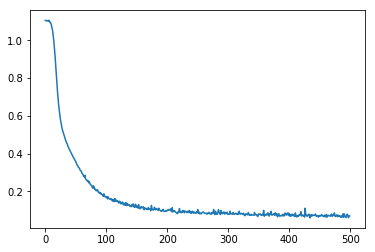

In [70]:
plt.plot(losses)
plt.show()

## 推論

In [71]:
x[0] # 入力変数

array([5. , 3. , 1.6, 0.2])

In [72]:
t[0] # 実測値

array([1, 0, 0], dtype=uint8)

In [75]:
y = model.predict(x[0])
y = np.argmax(softmax(y))
y # index番号0番目が1となっている

0

In [76]:
y = model.predict(x)
y = np.argmax(softmax(y), axis=1)
y

array([0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1,
       1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1,
       2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2])

In [77]:
model.accuracy(x, t)

0.98

### 訓練データ、テストデータを分けて実践してみると尚良し